<a href="https://colab.research.google.com/github/JunaidMovar/ML-DL-Learning/blob/master/FASHION_MNIST_TF_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.version.VERSION)
import matplotlib.pyplot as plt
import numpy as np
import os

2.3.0


In [25]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
Device = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(Device[0],True)
np.random.seed(2)
tf.random.set_seed(2)



#**0.** T-shirt/top **1.** Trouser 
#**2.** Pullover **3.** Dress          
#**4.** Coat **5.** Sandal         
#**6.** Shirt **7.** Sneaker        
#**8.** Bag **9.** Ankle boot

In [4]:
Data,Info = tfds.load(name="fashion_mnist", split="train",with_info=True)
Voc = {0: 'T-shirt/top', 1: 'Trouser',2: 'Pullover', 3: 'Dress',4: 'Coat', 
       5: 'Sandal',6: 'Shirt', 7:'Sneaker',8: 'Bag', 9: 'Ankle boot'}

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteSLJEV5/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteSLJEV5/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


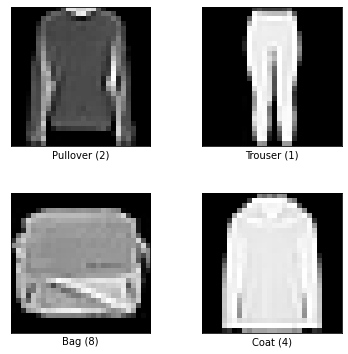

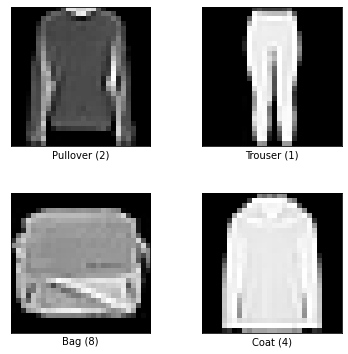

In [110]:
%matplotlib inline
tfds.show_examples(ds=Data,ds_info=Info,rows=2,cols=2)

In [97]:
(DataTrain,DataTest),Info = tfds.load(name="fashion_mnist", 
                      split=["train","test"],
                      as_supervised=True,
                      with_info=True)
@tf.function
def normalized(image,label):
  return tf.cast(image,tf.float32)/255,label
AUTOTUNE = tf.data.experimental.AUTOTUNE
DataTrain.map(normalized,num_parallel_calls=AUTOTUNE)
DataTrain = DataTrain.cache()
DataTrain = DataTrain.shuffle(60000)
DataTrain = DataTrain.batch(16)
DataTrain = DataTrain.prefetch(AUTOTUNE)

DataTest.map(normalized,num_parallel_calls=AUTOTUNE)
DataTest = DataTest.batch(32)
DataTest = DataTest.prefetch(AUTOTUNE)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,BatchNormalization, Flatten
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [103]:
print(str(tf.test.gpu_device_name()))
with tf.device(str(tf.test.gpu_device_name())):
  model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),   
        
        Flatten(),
        
        Dense(1024, activation='relu'),
        
        Dense(512, activation='relu'),
        
        Dense(10, activation='softmax')
    ])
    
  adam = Adam(lr=0.0001, decay=1e-6)
  model.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  model.summary()

/device:GPU:0
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_38 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 26, 26, 64)        36928     
_________________________________________________________________
batch_normalization_39 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_40 (Batc (None, 13,

In [104]:
with tf.device(str(tf.test.gpu_device_name())):
  History = model.fit(DataTrain,epochs=15,verbose=2,validation_data=DataTest)
  model.evaluate(DataTest)

Epoch 1/15
3750/3750 - 55s - loss: 0.3867 - accuracy: 0.8589 - val_loss: 0.2849 - val_accuracy: 0.8921
Epoch 2/15
3750/3750 - 55s - loss: 0.2408 - accuracy: 0.9112 - val_loss: 0.2797 - val_accuracy: 0.8991
Epoch 3/15
3750/3750 - 55s - loss: 0.1870 - accuracy: 0.9308 - val_loss: 0.2716 - val_accuracy: 0.9056
Epoch 4/15
3750/3750 - 55s - loss: 0.1500 - accuracy: 0.9440 - val_loss: 0.2607 - val_accuracy: 0.9083
Epoch 5/15
3750/3750 - 55s - loss: 0.1194 - accuracy: 0.9563 - val_loss: 0.2363 - val_accuracy: 0.9252
Epoch 6/15
3750/3750 - 55s - loss: 0.0959 - accuracy: 0.9640 - val_loss: 0.2838 - val_accuracy: 0.9178
Epoch 7/15
3750/3750 - 55s - loss: 0.0804 - accuracy: 0.9705 - val_loss: 0.2890 - val_accuracy: 0.9219
Epoch 8/15
3750/3750 - 55s - loss: 0.0672 - accuracy: 0.9743 - val_loss: 0.3060 - val_accuracy: 0.9214
Epoch 9/15
3750/3750 - 55s - loss: 0.0564 - accuracy: 0.9793 - val_loss: 0.2949 - val_accuracy: 0.9230
Epoch 10/15
3750/3750 - 55s - loss: 0.0495 - accuracy: 0.9819 - val_loss:

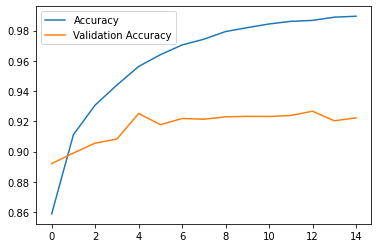

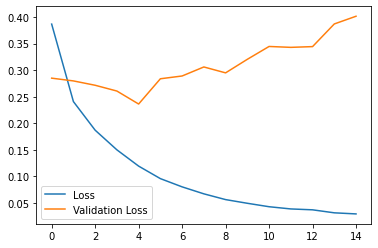

In [108]:
%matplotlib inline
plt.plot(History.history['accuracy'],label='Accuracy')
plt.plot(History.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()
plt.plot(History.history['loss'],label='Loss')
plt.plot(History.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()



In [116]:
Eval = model.evaluate(DataTest)
print(f'Evaluation Loss On Test Data Is : %f' % (Eval[0]))
print(f'Evaluation Accuracy On Test Data Is : %.2f%%' % (Eval[1]*100))


313/313 [==============================] - 3s 10ms/step - loss: 0.4014 - accuracy: 0.9223
Evaluation Loss On Test Data Is : 0.401442
Evaluation Accuracy On Test Data Is : 92.23%
